# Türkiye için Küresel Enerji Değerlendirmesi

## Bölüm 5 - G90 - 90 milyon nüfuslu ülkeler 


Barış Sanlı, barissanli2@gmail.com

Enerji verileri için https://www.energyinst.org/statistical-review/resources-and-data-downloads (Narrow - CSV Format) indirin

In [1]:
#!pip install plotnine         # 1. should be sufficient for most
#!pip install 'plotnine[all]'

In [2]:
# font sorunları için
# rebuild font cache https://stackoverflow.com/questions/37920935/matplotlib-cant-find-font-installed-in-my-linux-machine/70647041#70647041
# font install https://techoverflow.net/2024/01/29/how-to-fix-matplotlib-findfont-font-family-xkcd-not-found-on-ubuntu-22-04/
# brew install font-xkbcd

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
#warnings.filterwarnings(action='once')
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine.data import mtcars
from plotnine import *
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd


In [4]:
import pandas as pd

In [5]:
#%matplotlib inline

-------------deneme bölgesi--------------

In [6]:
df=pd.read_csv("merged_narrow.csv")
df.drop(columns=['Region', 'SubRegion',"OPEC","EU","OECD","CIS","ISO3166_alpha3","ISO3166_numeric"], inplace=True)

In [7]:
df.Country.unique

<bound method Series.unique of 0          Brazil
1          Brazil
2          Brazil
3          Brazil
4          Brazil
           ...   
283773    Vietnam
283774    Vietnam
283775    Vietnam
283776    Vietnam
283777    Vietnam
Name: Country, Length: 283778, dtype: object>

In [8]:
ulkeler=["Turkiye","Total World","Italy","Mexico","Iran","Germany"]
#İtalya ve Meksika, GDP olarak yakın
#İran ve Almanya, nüfus olaarak yakın
ilkyil=1965

In [9]:
ulkelertr=["Türkiye","Dünya","İtalya","Meksika","İran","Almanya"]

tercume = {ulkeler[i]: ulkelertr[i] for i in range(len(ulkeler))}


In [10]:
df.Var.unique()

array(['biodiesel_cons_kboed', 'biodiesel_cons_pj',
       'biodiesel_prod_kboed', 'biodiesel_prod_pj', 'biofuels_cons_ej',
       'biofuels_cons_kbd', 'biofuels_cons_kboed', 'biofuels_cons_pj',
       'biofuels_prod_kbd', 'biofuels_prod_kboed', 'biofuels_prod_pj',
       'biogeo_ej', 'biogeo_twh', 'biogeo_twh_net', 'co2_combust_mtco2',
       'co2_combust_pc', 'co2_combust_per_ej', 'co2_mtco2', 'coalcons_ej',
       'coalprod_ej', 'coalprod_mt', 'cobalt_kt', 'cobaltres_kt',
       'diesel_gasoil_cons_kbd', 'elect_twh', 'electbyfuel_coal',
       'electbyfuel_gas', 'electbyfuel_hydro', 'electbyfuel_nuclear',
       'electbyfuel_oil', 'electbyfuel_other', 'electbyfuel_ren_power',
       'electbyfuel_total', 'ethanol_cons_kboed', 'ethanol_cons_pj',
       'ethanol_prod_kboed', 'ethanol_prod_pj', 'fuel_oil_cons_kbd',
       'gascons_bcfd', 'gascons_bcm', 'gascons_ej', 'gasflared_bcm',
       'gasflared_mtco2', 'gasoline_cons_kbd', 'gasprod_bcfd',
       'gasprod_bcm', 'gasprod_ej', 'graph

In [11]:
degiskenler=["pop", "GDP", "primary_ej","primary_eintensity","oilcons_ej", "gascons_ej","coalcons_ej","renewables_ej","co2_mtco2","elect_twh","ren_power_twh","solar_twh","wind_twh" ]

In [12]:
df=pd.read_csv("merged_narrow.csv")
df.drop(columns=['Region', 'SubRegion',"OPEC","EU","OECD","CIS","ISO3166_alpha3","ISO3166_numeric"], inplace=True)

In [13]:
ds=df[df.Country.isin(ulkeler) & (df.Year>ilkyil) & df.Var.isin(degiskenler)]

In [14]:
dt=ds.pivot_table(index="Year",columns=["Country","Var"],values="Value")

In [15]:
for i in ulkeler:
      dt[i,"GDP"] = dt[i,"primary_ej"]/ dt[i,"primary_eintensity"]

In [16]:
plt.rcdefaults()
plt.style.use('ggplot')
plt.style.use('seaborn-v0_8-whitegrid')

#plt.xkcd()

#plt.figure(figsize=(12,6))
matplotlib.rcParams['figure.figsize'] = (10, 6)
plt.xkcd()

# Nüfus

In [17]:
degiskenler

['pop',
 'GDP',
 'primary_ej',
 'primary_eintensity',
 'oilcons_ej',
 'gascons_ej',
 'coalcons_ej',
 'renewables_ej',
 'co2_mtco2',
 'elect_twh',
 'ren_power_twh',
 'solar_twh',
 'wind_twh']

pop


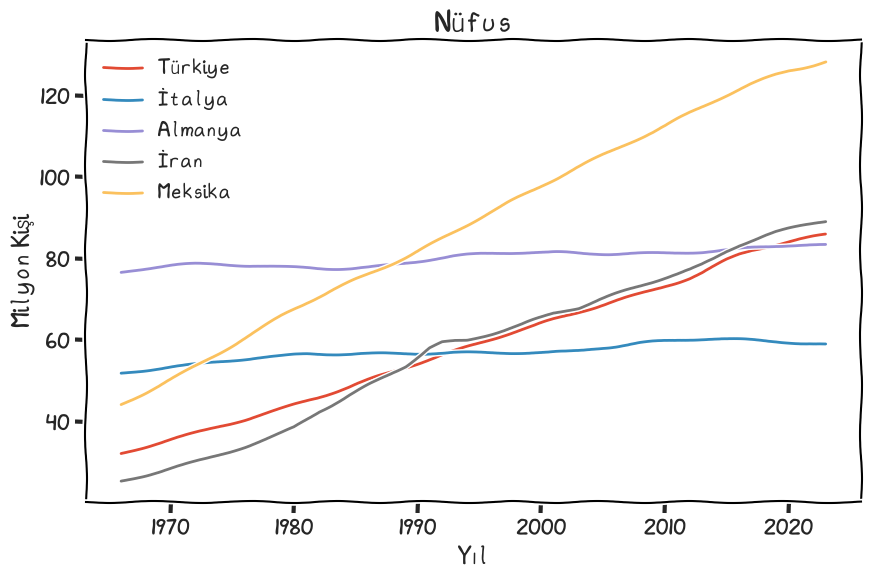

In [18]:
t=0
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])]
tr=dt[('Turkiye',degiskenler[t])]

plt.plot(dt["Turkiye",degiskenler[t]],label="Türkiye")
plt.plot(dt["Italy",degiskenler[t]],label="İtalya")
plt.plot(dt["Germany",degiskenler[t]],label="Almanya")
plt.plot(dt["Iran",degiskenler[t]],label="İran")
plt.plot(dt["Mexico",degiskenler[t]],label="Meksika")


#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Nüfus")
plt.xlabel("Yıl")
plt.ylabel("Milyon Kişi")
plt.legend()

pop


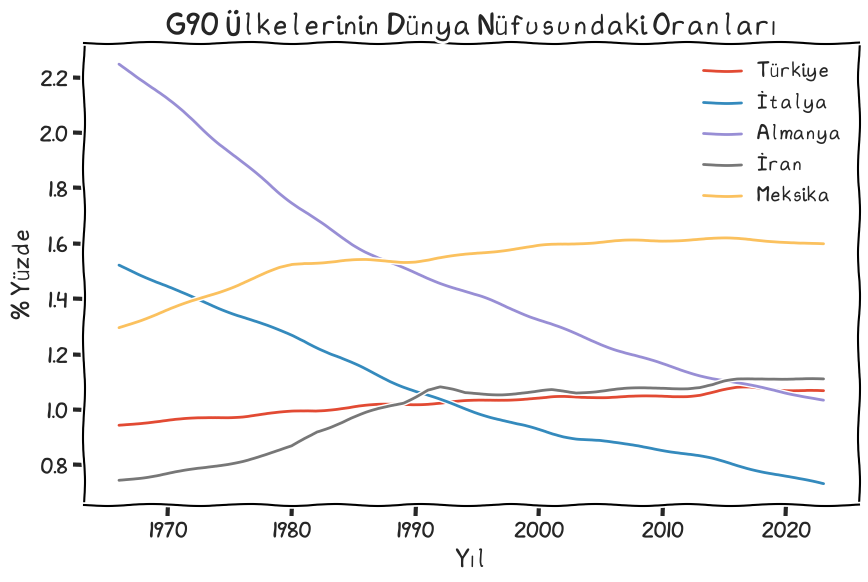

In [19]:
t=0
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])]/100 #yüzde hesabı için
tr=dt[('Turkiye',degiskenler[t])]

plt.plot(dt["Turkiye",degiskenler[t]]/w,label="Türkiye")
plt.plot(dt["Italy",degiskenler[t]]/w,label="İtalya")
plt.plot(dt["Germany",degiskenler[t]]/w,label="Almanya")
plt.plot(dt["Iran",degiskenler[t]]/w,label="İran")
plt.plot(dt["Mexico",degiskenler[t]]/w,label="Meksika")

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("G90 Ülkelerinin Dünya Nüfusundaki Oranları")
plt.xlabel("Yıl")
plt.ylabel("% Yüzde")
plt.legend()

pop


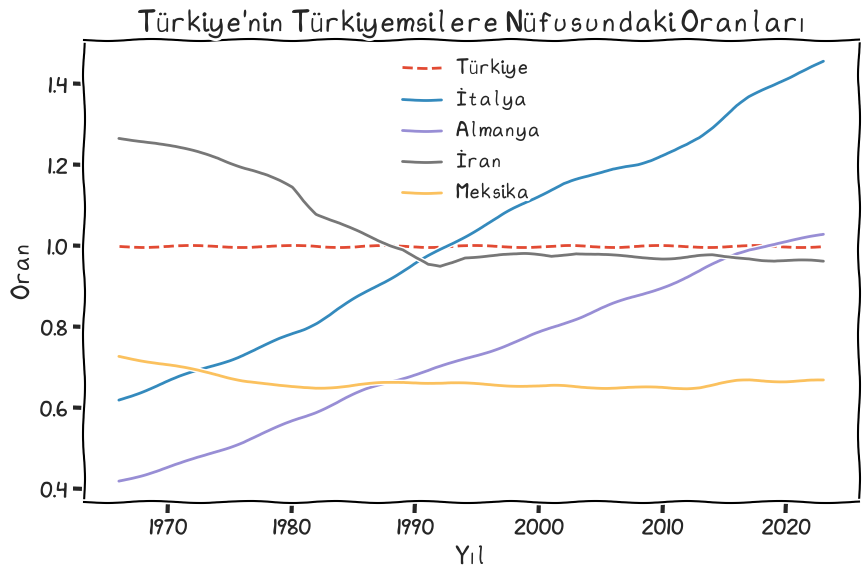

In [20]:
t=0
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])]/100 #yüzde hesabı için
tr=dt[('Turkiye',degiskenler[t])]

plt.plot(tr/dt["Turkiye",degiskenler[t]],label="Türkiye",linestyle="--")
plt.plot(tr/dt["Italy",degiskenler[t]],label="İtalya")
plt.plot(tr/dt["Germany",degiskenler[t]],label="Almanya")
plt.plot(tr/dt["Iran",degiskenler[t]],label="İran")
plt.plot(tr/dt["Mexico",degiskenler[t]],label="Meksika")

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Türkiye'nin Türkiyemsilere Nüfusundaki Oranları")
plt.xlabel("Yıl")
plt.ylabel("Oran")
plt.legend()

# Ekonomi

In [21]:
degiskenler

['pop',
 'GDP',
 'primary_ej',
 'primary_eintensity',
 'oilcons_ej',
 'gascons_ej',
 'coalcons_ej',
 'renewables_ej',
 'co2_mtco2',
 'elect_twh',
 'ren_power_twh',
 'solar_twh',
 'wind_twh']

GDP


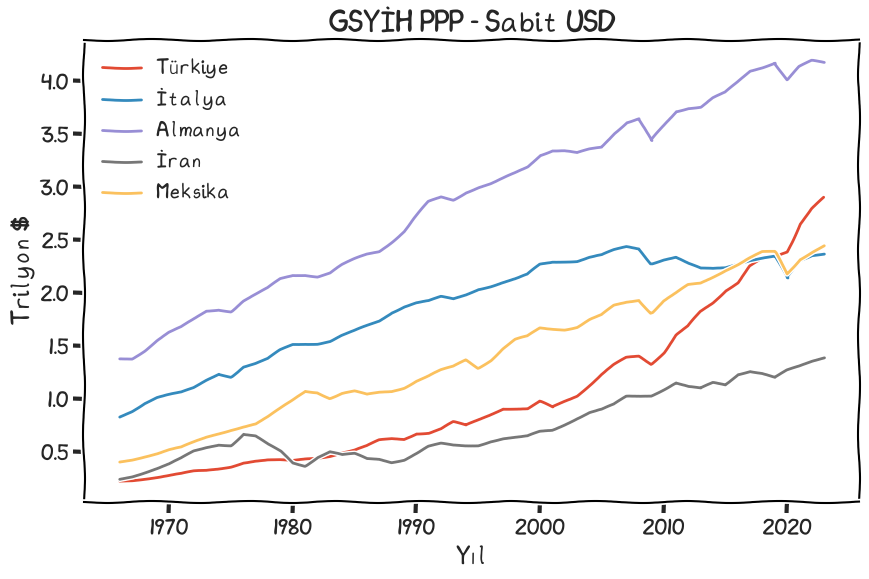

In [22]:
t=1
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])]
tr=dt[('Turkiye',degiskenler[t])]

plt.plot(dt["Turkiye",degiskenler[t]],label="Türkiye")
plt.plot(dt["Italy",degiskenler[t]],label="İtalya")
plt.plot(dt["Germany",degiskenler[t]],label="Almanya")
plt.plot(dt["Iran",degiskenler[t]],label="İran")
plt.plot(dt["Mexico",degiskenler[t]],label="Meksika")


#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("GSYİH PPP - Sabit USD")
plt.xlabel("Yıl")
plt.ylabel("Trilyon $")
plt.legend()

GDP


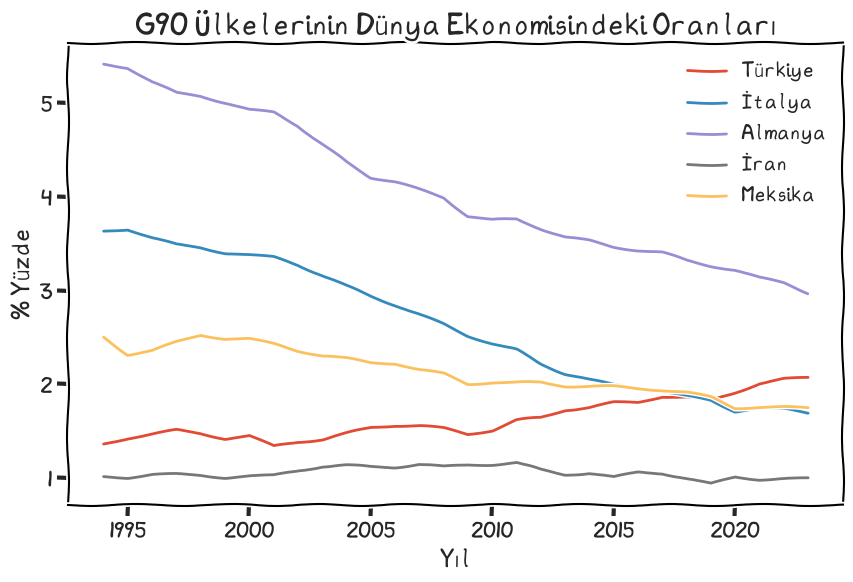

In [23]:
t=1

dt90=dt[dt.index>1993]
print(degiskenler[t])

w=dt90[('Total World',degiskenler[t])]/100 #yüzde hesabı için
tr=dt90[('Turkiye',degiskenler[t])]

plt.plot(dt["Turkiye",degiskenler[t]]/w,label="Türkiye")
plt.plot(dt["Italy",degiskenler[t]]/w,label="İtalya")
plt.plot(dt["Germany",degiskenler[t]]/w,label="Almanya")
plt.plot(dt["Iran",degiskenler[t]]/w,label="İran")
plt.plot(dt["Mexico",degiskenler[t]]/w,label="Meksika")

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("G90 Ülkelerinin Dünya Ekonomisindeki Oranları")
plt.xlabel("Yıl")
plt.ylabel("% Yüzde")
plt.legend()

GDP


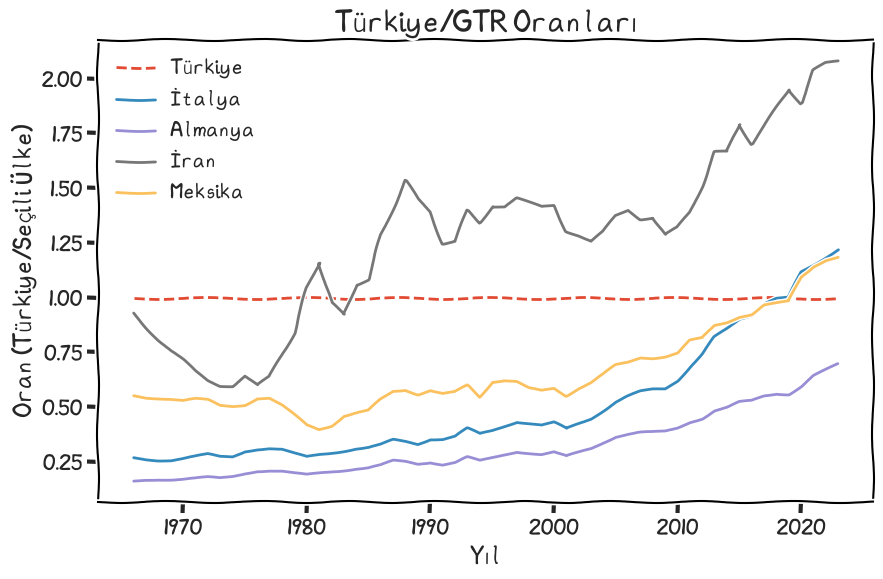

In [24]:
t=1

dt90=dt[dt.index>1993]
print(degiskenler[t])

#w=dt90[('Total World',degiskenler[t])]/100 #yüzde hesabı için
tr=dt[('Turkiye',degiskenler[t])]

plt.plot(tr/dt["Turkiye",degiskenler[t]],label="Türkiye",linestyle="--")
plt.plot(tr/dt["Italy",degiskenler[t]],label="İtalya")
plt.plot(tr/dt["Germany",degiskenler[t]],label="Almanya")
plt.plot(tr/dt["Iran",degiskenler[t]],label="İran")
plt.plot(tr/dt["Mexico",degiskenler[t]],label="Meksika")

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Türkiye/GTR Oranları")
plt.xlabel("Yıl")
plt.ylabel("Oran (Türkiye/Seçili Ülke)")
plt.legend()

In [25]:
for i in ulkeler:
  print(i, (tr/dt[(i,degiskenler[t])]).values[-1])

Turkiye 1.0
Total World 0.020670488235733836
Italy 1.21977961920996
Mexico 1.1844718700819692
Iran 2.0800384817828736
Germany 0.6941796184320598


# Birincil Enerji

primary_ej


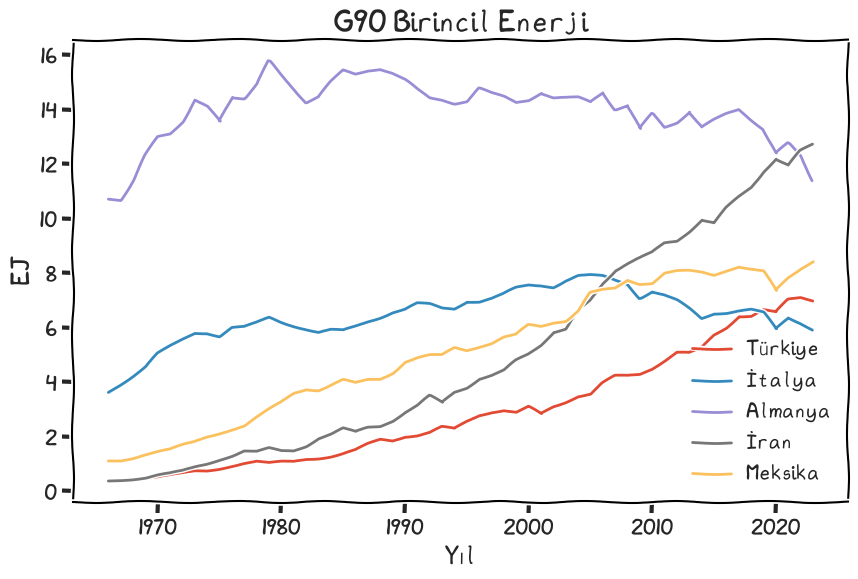

In [26]:
t=2
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])]
tr=dt[('Turkiye',degiskenler[t])]

plt.plot(dt["Turkiye",degiskenler[t]],label="Türkiye")
plt.plot(dt["Italy",degiskenler[t]],label="İtalya")
plt.plot(dt["Germany",degiskenler[t]],label="Almanya")
plt.plot(dt["Iran",degiskenler[t]],label="İran")
plt.plot(dt["Mexico",degiskenler[t]],label="Meksika")


#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("G90 Birincil Enerji")
plt.xlabel("Yıl")
plt.ylabel("EJ")
plt.legend()

primary_ej


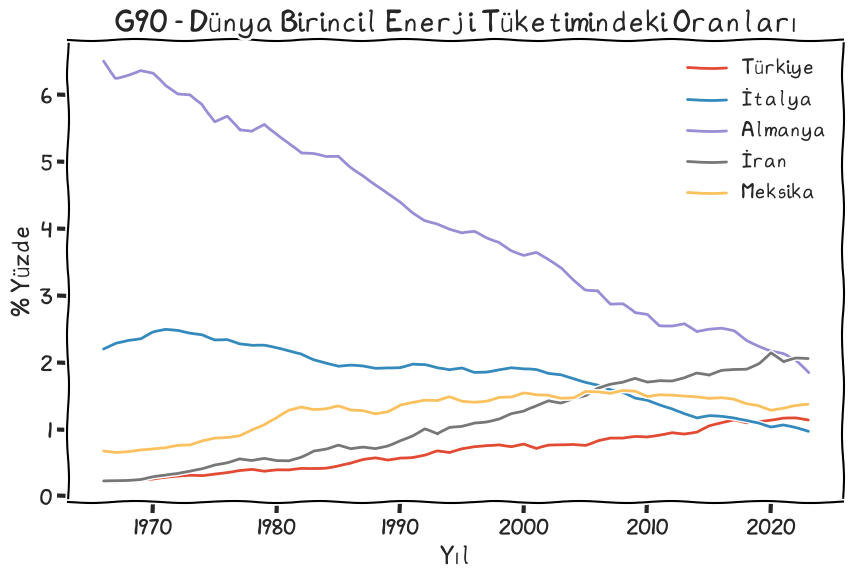

In [27]:
t=2

dt90=dt[dt.index>1993]
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])]/100 #yüzde hesabı için
tr=dt90[('Turkiye',degiskenler[t])]

plt.plot(dt["Turkiye",degiskenler[t]]/w,label="Türkiye")
plt.plot(dt["Italy",degiskenler[t]]/w,label="İtalya")
plt.plot(dt["Germany",degiskenler[t]]/w,label="Almanya")
plt.plot(dt["Iran",degiskenler[t]]/w,label="İran")
plt.plot(dt["Mexico",degiskenler[t]]/w,label="Meksika")

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("G90 - Dünya Birincil Enerji Tüketimindeki Oranları")
plt.xlabel("Yıl")
plt.ylabel("% Yüzde")
plt.legend()

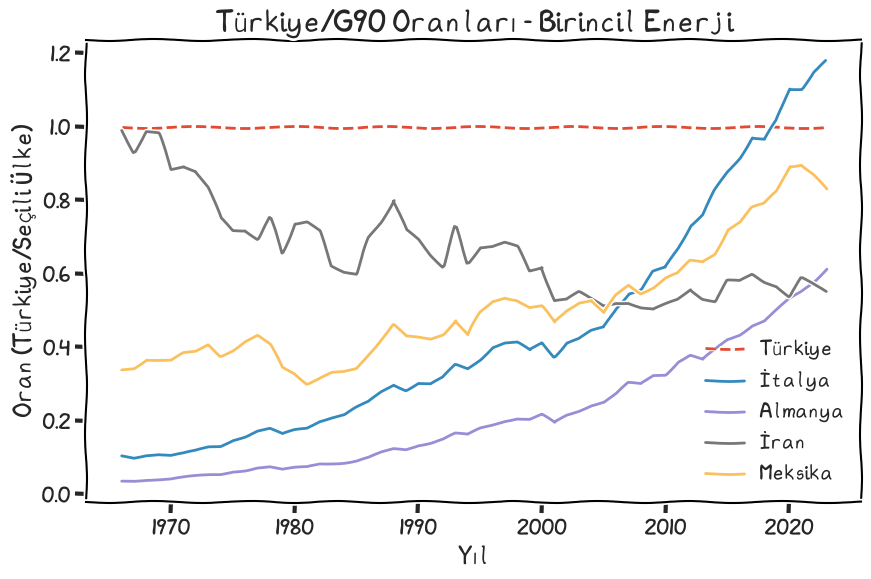

In [28]:
t=2

#dt90=dt[dt.index>1993]
#print(degiskenler[t])
#w=dt90[('Total World',degiskenler[t])]/100 #yüzde hesabı için
tr=dt[('Turkiye',degiskenler[t])]

plt.plot(tr/dt["Turkiye",degiskenler[t]],label="Türkiye",linestyle="--")
plt.plot(tr/dt["Italy",degiskenler[t]],label="İtalya")
plt.plot(tr/dt["Germany",degiskenler[t]],label="Almanya")
plt.plot(tr/dt["Iran",degiskenler[t]],label="İran")
plt.plot(tr/dt["Mexico",degiskenler[t]],label="Meksika")

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Türkiye/G90 Oranları - Birincil Enerji")
plt.xlabel("Yıl")
plt.ylabel("Oran (Türkiye/Seçili Ülke)")
plt.legend()

# Petrol Tüketimi

In [29]:
degiskenler

['pop',
 'GDP',
 'primary_ej',
 'primary_eintensity',
 'oilcons_ej',
 'gascons_ej',
 'coalcons_ej',
 'renewables_ej',
 'co2_mtco2',
 'elect_twh',
 'ren_power_twh',
 'solar_twh',
 'wind_twh']

oilcons_ej


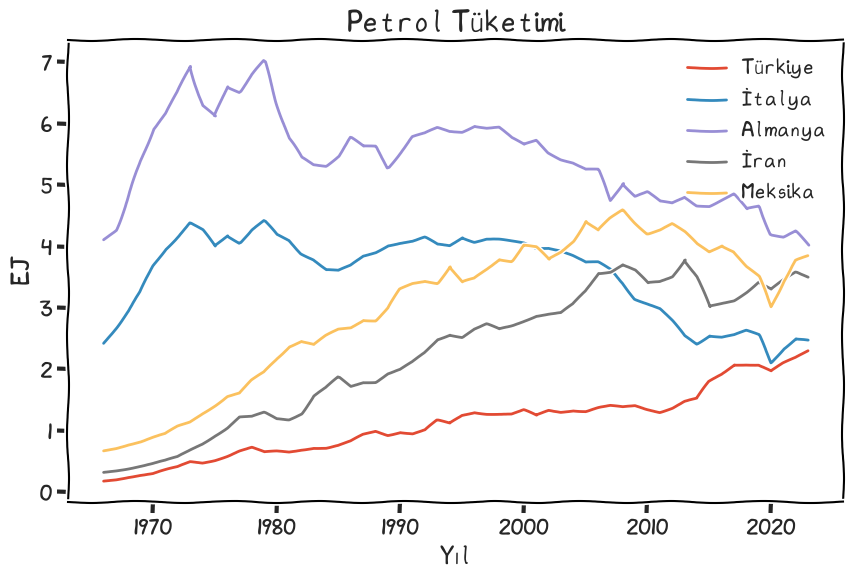

In [30]:
t=4
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])]
tr=dt[('Turkiye',degiskenler[t])]

plt.plot(dt["Turkiye",degiskenler[t]],label="Türkiye")
plt.plot(dt["Italy",degiskenler[t]],label="İtalya")
plt.plot(dt["Germany",degiskenler[t]],label="Almanya")
plt.plot(dt["Iran",degiskenler[t]],label="İran")
plt.plot(dt["Mexico",degiskenler[t]],label="Meksika")


#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Petrol Tüketimi")
plt.xlabel("Yıl")
plt.ylabel("EJ")
plt.legend()

oilcons_ej


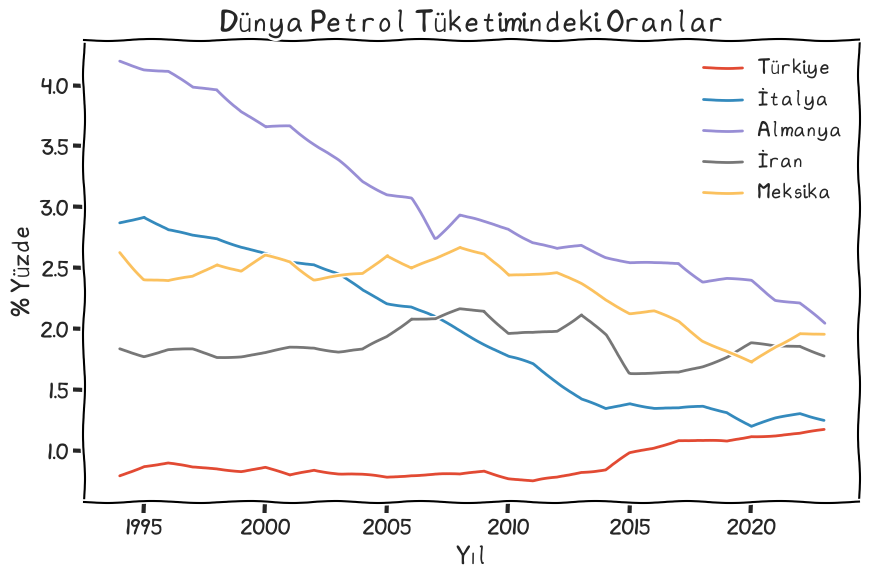

In [31]:
t=4

dt90=dt[dt.index>1993]
print(degiskenler[t])

w=dt90[('Total World',degiskenler[t])]/100 #yüzde hesabı için
tr=dt90[('Turkiye',degiskenler[t])]

plt.plot(dt["Turkiye",degiskenler[t]]/w,label="Türkiye")
plt.plot(dt["Italy",degiskenler[t]]/w,label="İtalya")
plt.plot(dt["Germany",degiskenler[t]]/w,label="Almanya")
plt.plot(dt["Iran",degiskenler[t]]/w,label="İran")
plt.plot(dt["Mexico",degiskenler[t]]/w,label="Meksika")

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Dünya Petrol Tüketimindeki Oranlar")
plt.xlabel("Yıl")
plt.ylabel("% Yüzde")
plt.legend()

oilcons_ej


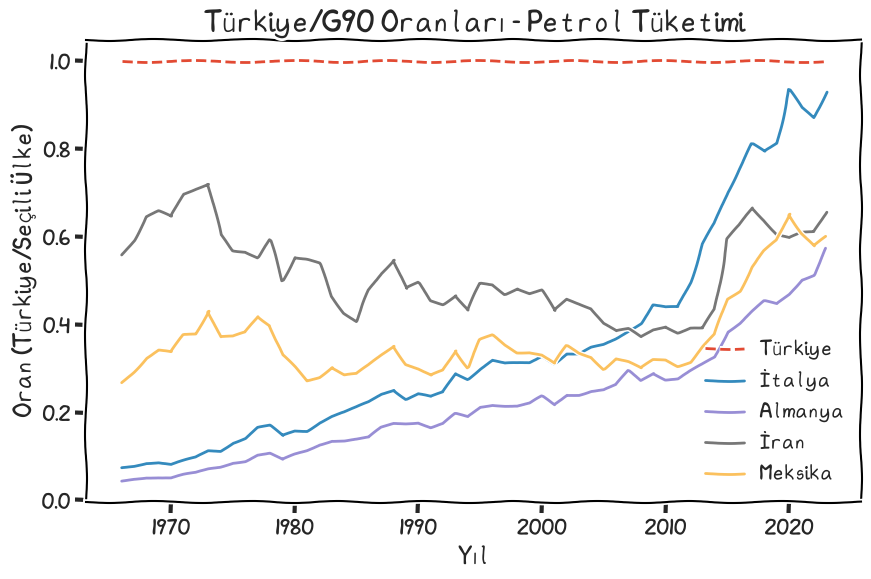

In [32]:
t=4

#dt90=dt[dt.index>1993]
print(degiskenler[t])
#w=dt90[('Total World',degiskenler[t])]/100 #yüzde hesabı için
tr=dt[('Turkiye',degiskenler[t])]

plt.plot(tr/dt["Turkiye",degiskenler[t]],label="Türkiye",linestyle="--")
plt.plot(tr/dt["Italy",degiskenler[t]],label="İtalya")
plt.plot(tr/dt["Germany",degiskenler[t]],label="Almanya")
plt.plot(tr/dt["Iran",degiskenler[t]],label="İran")
plt.plot(tr/dt["Mexico",degiskenler[t]],label="Meksika")

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Türkiye/G90 Oranları - Petrol Tüketimi")
plt.xlabel("Yıl")
plt.ylabel("Oran (Türkiye/Seçili Ülke)")
plt.legend()

# Doğalgaz

gascons_ej


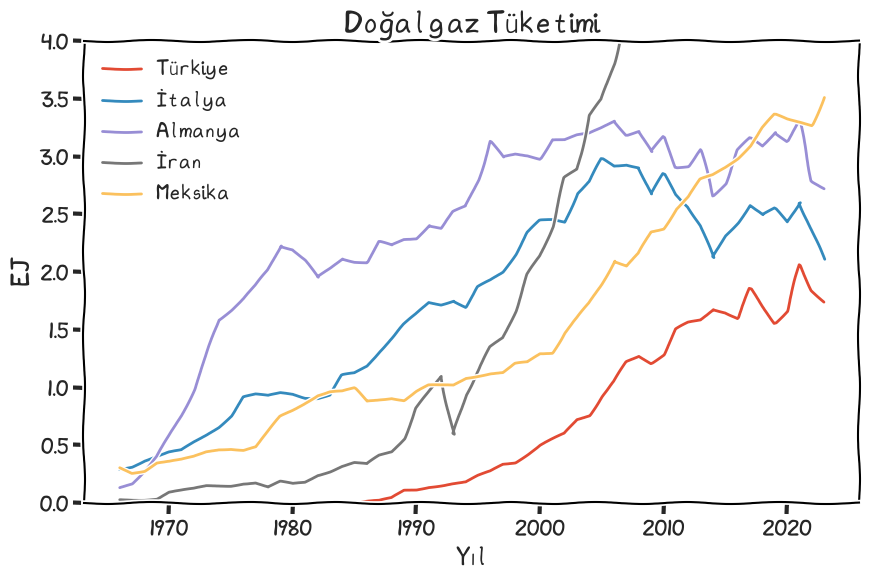

In [33]:
t=5
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])]
tr=dt[('Turkiye',degiskenler[t])]

plt.plot(dt["Turkiye",degiskenler[t]],label="Türkiye")
plt.plot(dt["Italy",degiskenler[t]],label="İtalya")
plt.plot(dt["Germany",degiskenler[t]],label="Almanya")
plt.plot(dt["Iran",degiskenler[t]],label="İran")
plt.plot(dt["Mexico",degiskenler[t]],label="Meksika")
plt.ylim(0,4)

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Doğalgaz Tüketimi")
plt.xlabel("Yıl")
plt.ylabel("EJ")
plt.legend()

In [34]:
dt["Iran",degiskenler[t]]

Year
1966    0.029490
1967    0.030917
1968    0.033024
1969    0.038750
1970    0.091888
1971    0.106356
1972    0.121745
1973    0.147877
1974    0.150354
1975    0.153392
1976    0.172784
1977    0.176691
1978    0.136830
1979    0.183315
1980    0.163275
1981    0.177409
1982    0.242968
1983    0.277679
1984    0.323239
1985    0.348712
1986    0.334997
1987    0.410104
1988    0.445229
1989    0.562206
1990    0.820746
1991    0.955117
1992    1.098658
1993    0.594474
1994    0.939790
1995    1.147248
1996    1.349258
1997    1.431085
1998    1.664329
1999    1.979015
2000    2.139872
2001    2.395177
2002    2.815932
2003    2.889963
2004    3.357217
2005    3.493689
2006    3.808224
2007    4.267880
2008    4.528322
2009    4.852599
2010    5.198019
2011    5.514934
2012    5.491639
2013    5.538042
2014    6.242434
2015    6.624701
2016    7.067486
2017    7.380143
2018    7.655162
2019    7.862024
2020    8.523624
2021    8.263132
2022    8.618446
2023    8.839926
Name: (Ir

gascons_ej


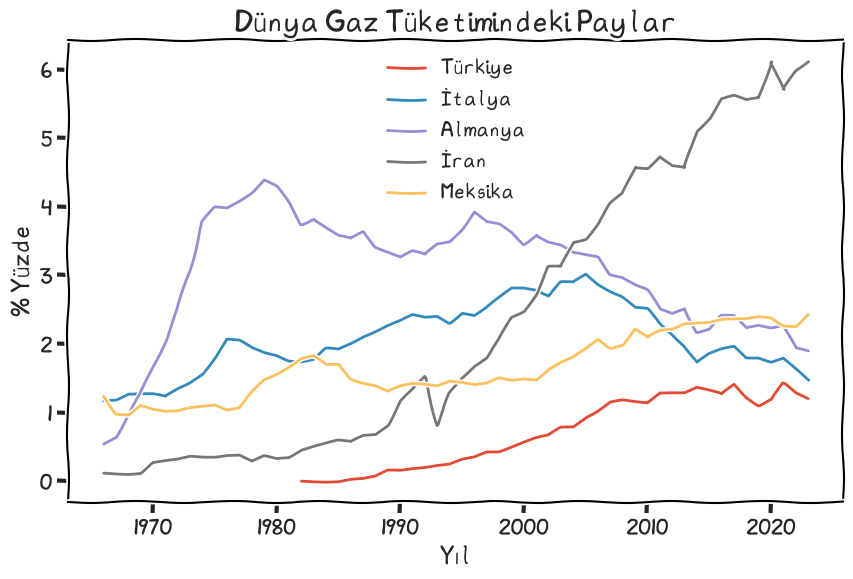

In [35]:
t=5

dt90=dt[dt.index>1993]
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])]/100 #yüzde hesabı için
tr=dt90[('Turkiye',degiskenler[t])]

plt.plot(dt["Turkiye",degiskenler[t]]/w,label="Türkiye")
plt.plot(dt["Italy",degiskenler[t]]/w,label="İtalya")
plt.plot(dt["Germany",degiskenler[t]]/w,label="Almanya")
plt.plot(dt["Iran",degiskenler[t]]/w,label="İran")
plt.plot(dt["Mexico",degiskenler[t]]/w,label="Meksika")

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Dünya Gaz Tüketimindeki Paylar")
plt.xlabel("Yıl")
plt.ylabel("% Yüzde")
plt.legend()

gascons_ej


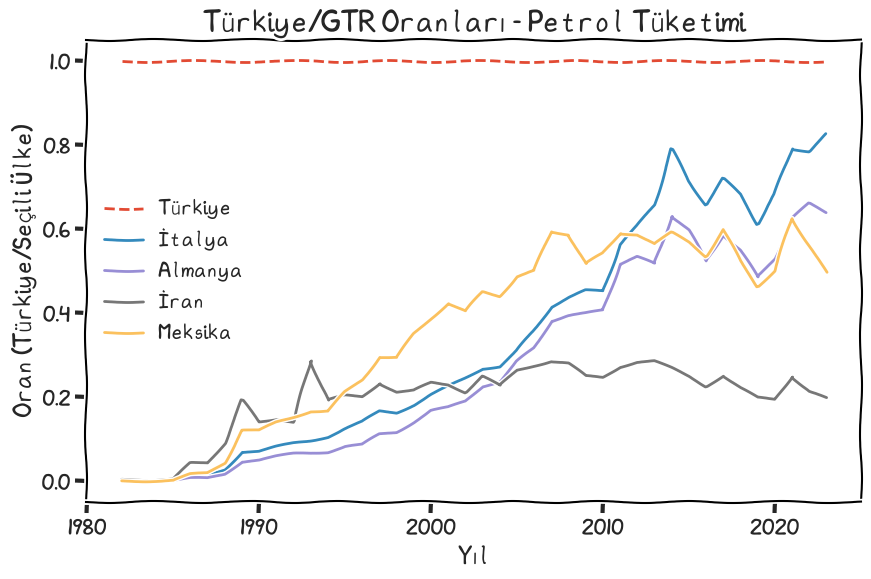

In [36]:
t=5

#dt90=dt[dt.index>1993]
print(degiskenler[t])
#w=dt90[('Total World',degiskenler[t])]/100 #yüzde hesabı için
tr=dt[('Turkiye',degiskenler[t])]

plt.plot(tr/dt["Turkiye",degiskenler[t]],label="Türkiye",linestyle="--")
plt.plot(tr/dt["Italy",degiskenler[t]],label="İtalya")
plt.plot(tr/dt["Germany",degiskenler[t]],label="Almanya")
plt.plot(tr/dt["Iran",degiskenler[t]],label="İran")
plt.plot(tr/dt["Mexico",degiskenler[t]],label="Meksika")

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Türkiye/GTR Oranları - Petrol Tüketimi")
plt.xlabel("Yıl")
plt.ylabel("Oran (Türkiye/Seçili Ülke)")
plt.legend()

# Kömür

coalcons_ej


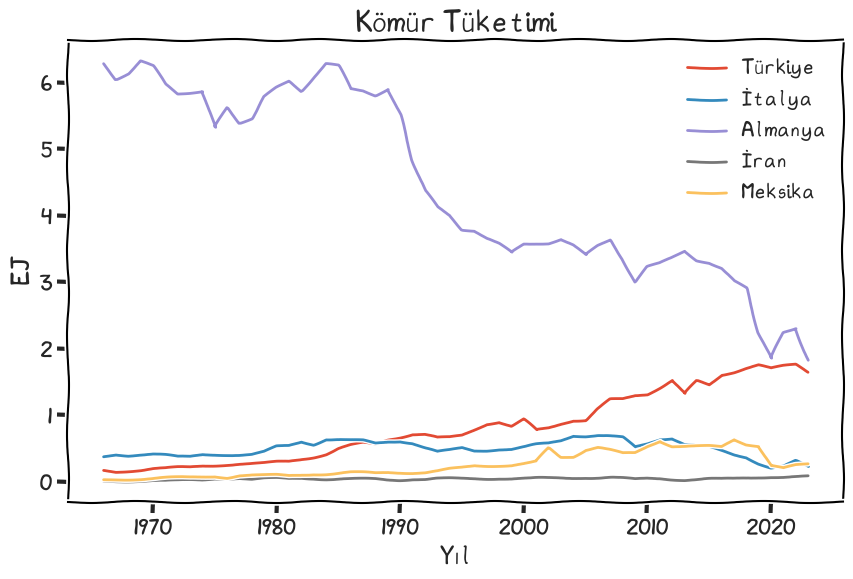

In [37]:
t=6
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])]
tr=dt[('Turkiye',degiskenler[t])]

plt.plot(dt["Turkiye",degiskenler[t]],label="Türkiye")
plt.plot(dt["Italy",degiskenler[t]],label="İtalya")
plt.plot(dt["Germany",degiskenler[t]],label="Almanya")
plt.plot(dt["Iran",degiskenler[t]],label="İran")
plt.plot(dt["Mexico",degiskenler[t]],label="Meksika")


#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Kömür Tüketimi")
plt.xlabel("Yıl")
plt.ylabel("EJ")
plt.legend()

coalcons_ej


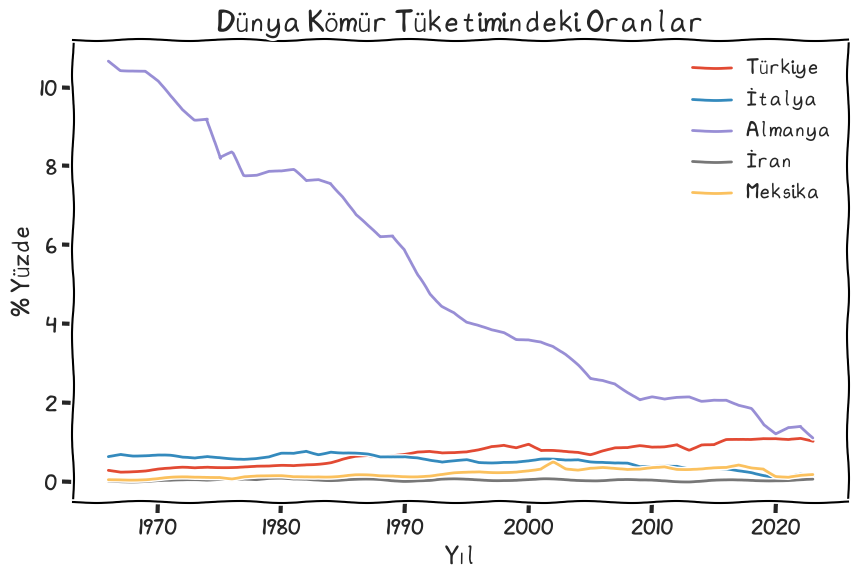

In [38]:
t=6

dt90=dt[dt.index>1993]
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])]/100 #yüzde hesabı için
tr=dt90[('Turkiye',degiskenler[t])]

plt.plot(dt["Turkiye",degiskenler[t]]/w,label="Türkiye")
plt.plot(dt["Italy",degiskenler[t]]/w,label="İtalya")
plt.plot(dt["Germany",degiskenler[t]]/w,label="Almanya")
plt.plot(dt["Iran",degiskenler[t]]/w,label="İran")
plt.plot(dt["Mexico",degiskenler[t]]/w,label="Meksika")

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Dünya Kömür Tüketimindeki Oranlar")
plt.xlabel("Yıl")
plt.ylabel("% Yüzde")
plt.legend()

coalcons_ej


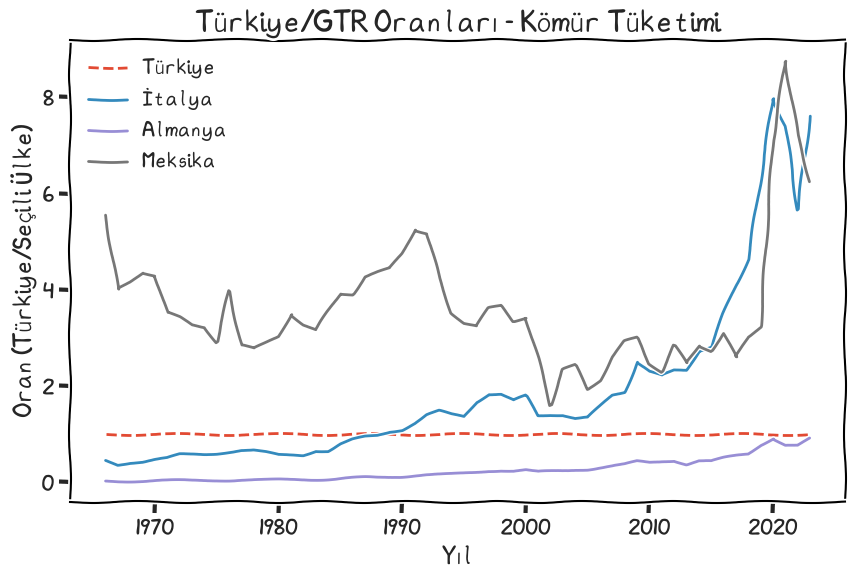

In [39]:
t=6

#dt90=dt[dt.index>1993]
print(degiskenler[t])
#w=dt90[('Total World',degiskenler[t])]/100 #yüzde hesabı için
tr=dt[('Turkiye',degiskenler[t])]

plt.plot(tr/dt["Turkiye",degiskenler[t]],label="Türkiye",linestyle="--")
plt.plot(tr/dt["Italy",degiskenler[t]],label="İtalya")
plt.plot(tr/dt["Germany",degiskenler[t]],label="Almanya")
#plt.plot(tr/dt["Iran",degiskenler[t]],label="İran")
plt.plot(tr/dt["Mexico",degiskenler[t]],label="Meksika")

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Türkiye/GTR Oranları - Kömür Tüketimi")
plt.xlabel("Yıl")
plt.ylabel("Oran (Türkiye/Seçili Ülke)")
plt.legend()

# Elektrik = 9

elect_twh


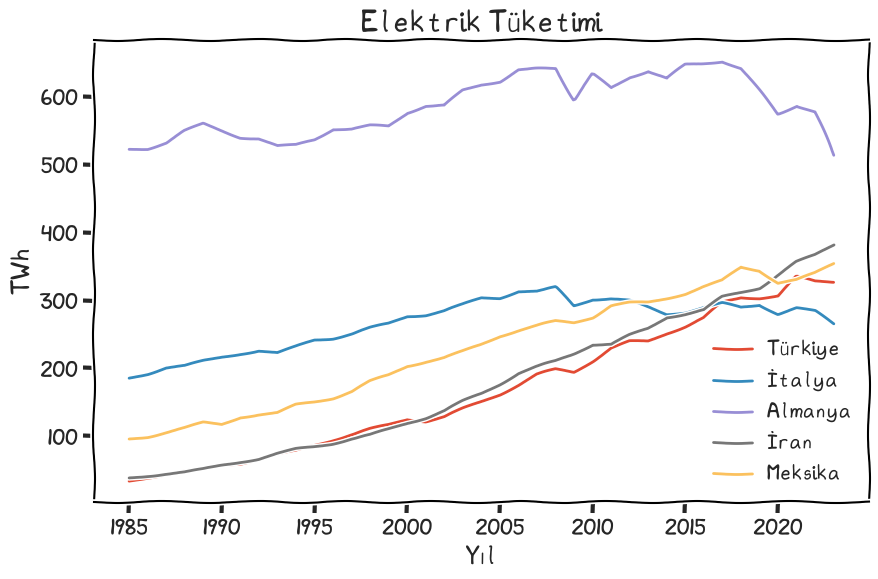

In [40]:
t=9
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])]
tr=dt[('Turkiye',degiskenler[t])]

plt.plot(dt["Turkiye",degiskenler[t]],label="Türkiye")
plt.plot(dt["Italy",degiskenler[t]],label="İtalya")
plt.plot(dt["Germany",degiskenler[t]],label="Almanya")
plt.plot(dt["Iran",degiskenler[t]],label="İran")
plt.plot(dt["Mexico",degiskenler[t]],label="Meksika")


#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Elektrik Tüketimi")
plt.xlabel("Yıl")
plt.ylabel("TWh")
plt.legend()

In [41]:
degiskenler

['pop',
 'GDP',
 'primary_ej',
 'primary_eintensity',
 'oilcons_ej',
 'gascons_ej',
 'coalcons_ej',
 'renewables_ej',
 'co2_mtco2',
 'elect_twh',
 'ren_power_twh',
 'solar_twh',
 'wind_twh']

elect_twh


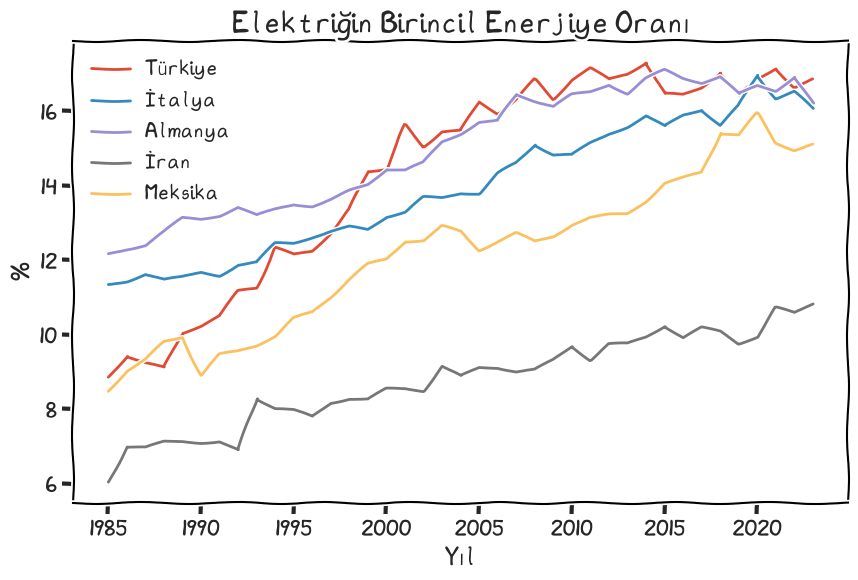

In [42]:
t=9
print(degiskenler[t])
t2=2
w=dt[('Total World',degiskenler[t])]
tr=dt[('Turkiye',degiskenler[t])]

plt.plot(0.36*dt["Turkiye",degiskenler[t]]/dt["Turkiye",degiskenler[t2]],label="Türkiye")
plt.plot(0.36*dt["Italy",degiskenler[t]]/dt["Italy",degiskenler[t2]],label="İtalya")
plt.plot(0.36*dt["Germany",degiskenler[t]]/dt["Germany",degiskenler[t2]],label="Almanya")
plt.plot(0.36*dt["Iran",degiskenler[t]]/dt["Iran",degiskenler[t2]],label="İran")
plt.plot(0.36*dt["Mexico",degiskenler[t]]/dt["Mexico",degiskenler[t2]],label="Meksika")


#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Elektriğin Birincil Enerjiye Oranı")
plt.xlabel("Yıl")
plt.ylabel("%")
plt.legend()

elect_twh


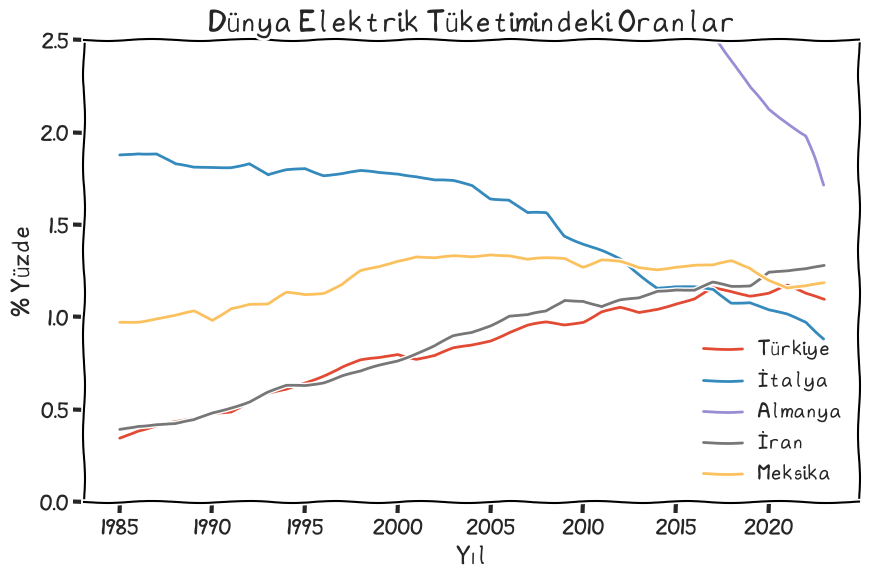

In [43]:
t=9

dt90=dt[dt.index>1993]
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])]/100 #yüzde hesabı için
tr=dt90[('Turkiye',degiskenler[t])]

plt.plot(dt["Turkiye",degiskenler[t]]/w,label="Türkiye")
plt.plot(dt["Italy",degiskenler[t]]/w,label="İtalya")
plt.plot(dt["Germany",degiskenler[t]]/w,label="Almanya")
plt.plot(dt["Iran",degiskenler[t]]/w,label="İran")
plt.plot(dt["Mexico",degiskenler[t]]/w,label="Meksika")
plt.ylim(0,2.5)
#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Dünya Elektrik Tüketimindeki Oranlar")
plt.xlabel("Yıl")
plt.ylabel("% Yüzde")
plt.legend()

elect_twh


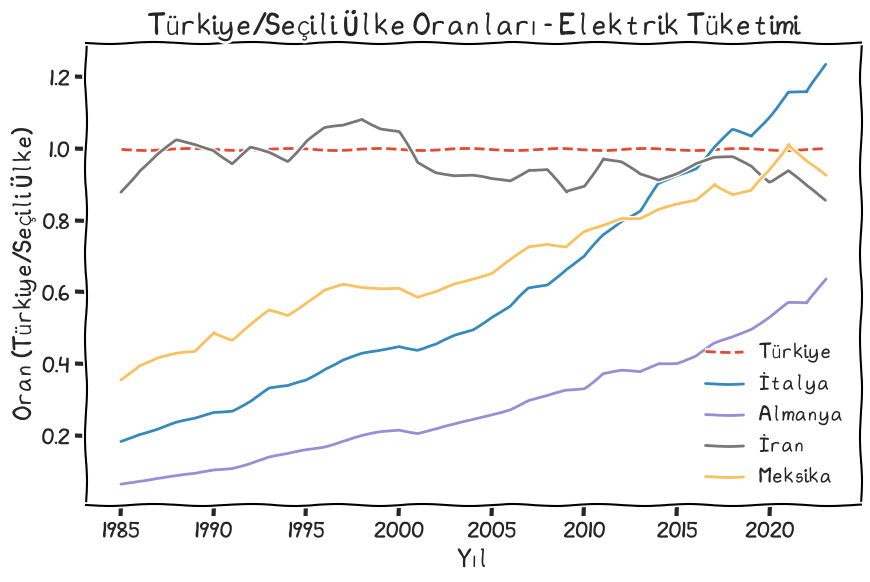

In [44]:
t=9

#dt90=dt[dt.index>1993]
print(degiskenler[t])
#w=dt90[('Total World',degiskenler[t])]/100 #yüzde hesabı için
tr=dt[('Turkiye',degiskenler[t])]

plt.plot(tr/dt["Turkiye",degiskenler[t]],label="Türkiye",linestyle="--")
plt.plot(tr/dt["Italy",degiskenler[t]],label="İtalya")
plt.plot(tr/dt["Germany",degiskenler[t]],label="Almanya")
plt.plot(tr/dt["Iran",degiskenler[t]],label="İran")
plt.plot(tr/dt["Mexico",degiskenler[t]],label="Meksika")

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Türkiye/Seçili Ülke Oranları - Elektrik Tüketimi")
plt.xlabel("Yıl")
plt.ylabel("Oran (Türkiye/Seçili Ülke)")
plt.legend()

# Elektriğin Oranı

In [45]:
degiskenler

['pop',
 'GDP',
 'primary_ej',
 'primary_eintensity',
 'oilcons_ej',
 'gascons_ej',
 'coalcons_ej',
 'renewables_ej',
 'co2_mtco2',
 'elect_twh',
 'ren_power_twh',
 'solar_twh',
 'wind_twh']

elect_twh


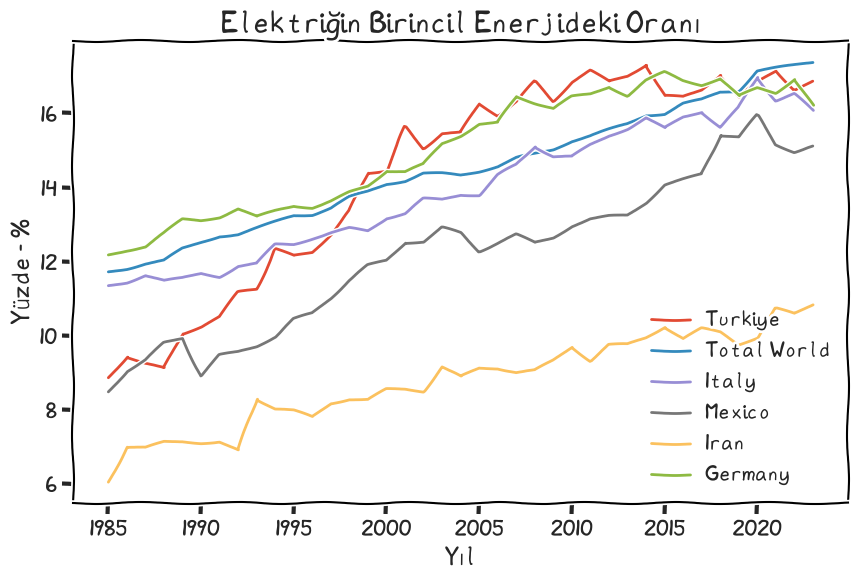

In [46]:
t=9

#dt90=dt[dt.index>1993]
print(degiskenler[t])
#w=dt90[('Total World',degiskenler[t])]/100 #yüzde hesabı için

for i in ulkeler:
   plt.plot(100*0.0036*dt[i,degiskenler[t]]/dt[i,degiskenler[2]],label=i)


#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Elektriğin Birincil Enerjideki Oranı")
plt.xlabel("Yıl")
plt.ylabel("Yüzde - %")
plt.legend()

ren_power_twh


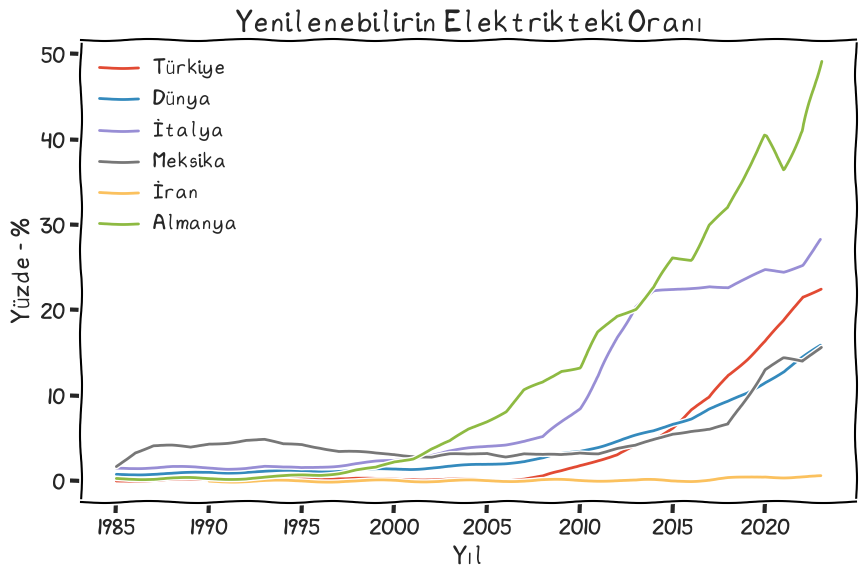

In [47]:
t=10

#dt90=dt[dt.index>1993]
print(degiskenler[t])
#w=dt90[('Total World',degiskenler[t])]/100 #yüzde hesabı için

for i in ulkeler:
   plt.plot(100*dt[i,degiskenler[t]]/dt[i,degiskenler[9]],label=tercume[i])


#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Yenilenebilirin Elektrikteki Oranı")
plt.xlabel("Yıl")
plt.ylabel("Yüzde - %")
plt.legend()

In [48]:
degiskenler

['pop',
 'GDP',
 'primary_ej',
 'primary_eintensity',
 'oilcons_ej',
 'gascons_ej',
 'coalcons_ej',
 'renewables_ej',
 'co2_mtco2',
 'elect_twh',
 'ren_power_twh',
 'solar_twh',
 'wind_twh']

renewables_ej


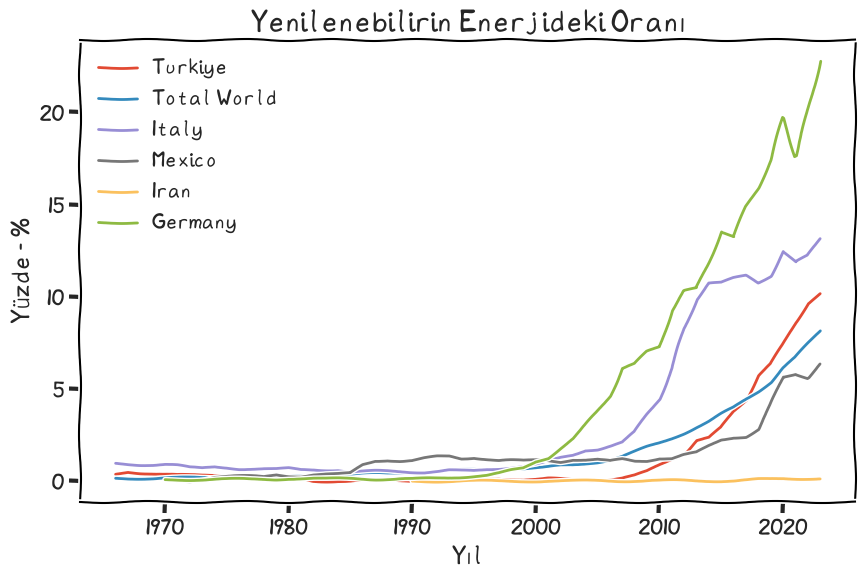

In [49]:
t=7

#dt90=dt[dt.index>1993]
print(degiskenler[t])
#w=dt90[('Total World',degiskenler[t])]/100 #yüzde hesabı için

for i in ulkeler:
   plt.plot(100*dt[i,degiskenler[t]]/dt[i,degiskenler[2]],label=i)


#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Yenilenebilirin Enerjideki Oranı")
plt.xlabel("Yıl")
plt.ylabel("Yüzde - %")
plt.legend()

# Emisyonlar = 8

co2_mtco2


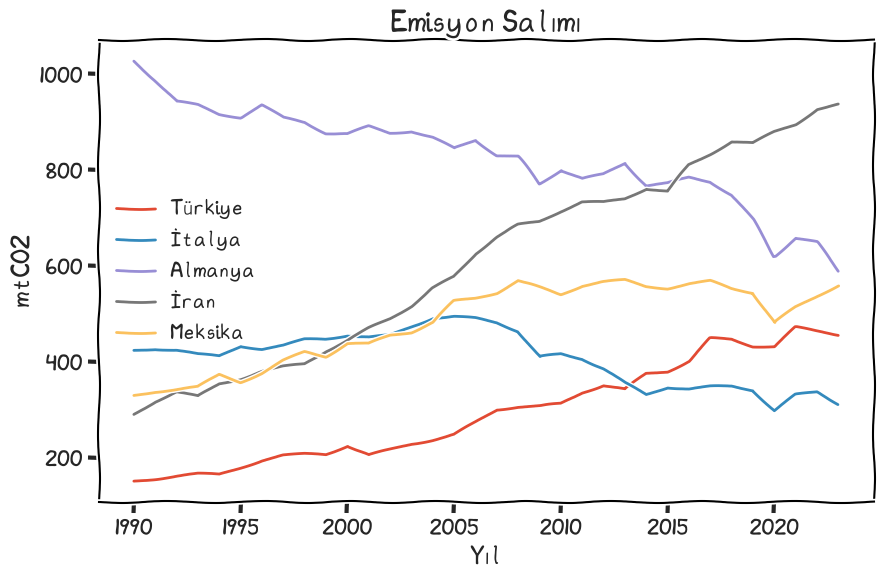

In [50]:
t=8
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])]
tr=dt[('Turkiye',degiskenler[t])]

plt.plot(dt["Turkiye",degiskenler[t]],label="Türkiye")
plt.plot(dt["Italy",degiskenler[t]],label="İtalya")
plt.plot(dt["Germany",degiskenler[t]],label="Almanya")
plt.plot(dt["Iran",degiskenler[t]],label="İran")
plt.plot(dt["Mexico",degiskenler[t]],label="Meksika")


#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Emisyon Salımı")
plt.xlabel("Yıl")
plt.ylabel("mtCO2")
plt.legend()

co2_mtco2


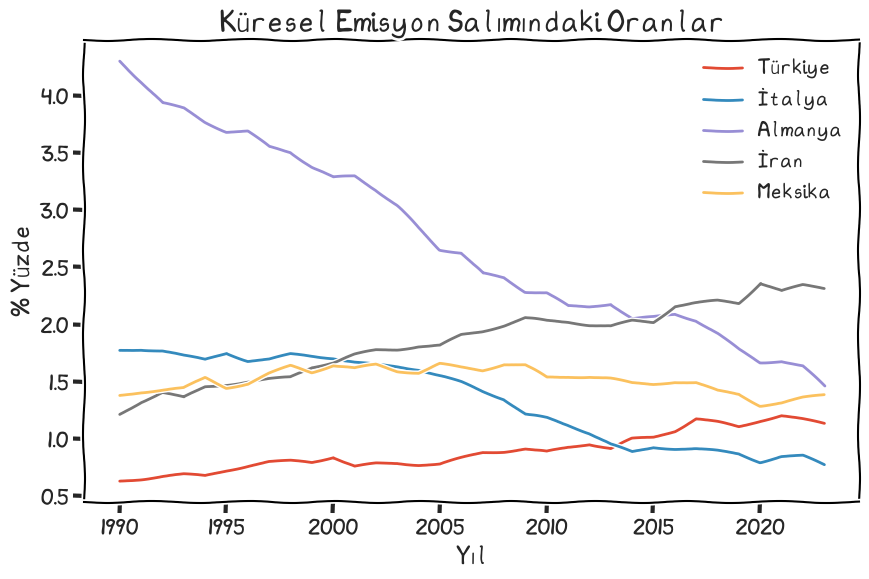

In [51]:
t=8

dt90=dt[dt.index>1993]
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])]/100 #yüzde hesabı için
tr=dt90[('Turkiye',degiskenler[t])]

plt.plot(dt["Turkiye",degiskenler[t]]/w,label="Türkiye")
plt.plot(dt["Italy",degiskenler[t]]/w,label="İtalya")
plt.plot(dt["Germany",degiskenler[t]]/w,label="Almanya")
plt.plot(dt["Iran",degiskenler[t]]/w,label="İran")
plt.plot(dt["Mexico",degiskenler[t]]/w,label="Meksika")

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Küresel Emisyon Salımındaki Oranlar")
plt.xlabel("Yıl")
plt.ylabel("% Yüzde")
plt.legend()

co2_mtco2


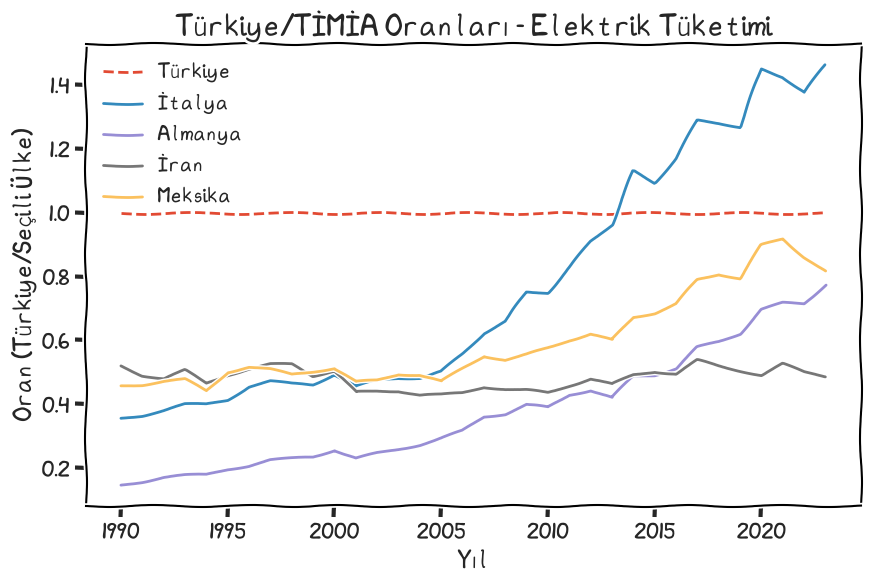

In [52]:
t=8

#dt90=dt[dt.index>1993]
print(degiskenler[t])
#w=dt90[('Total World',degiskenler[t])]/100 #yüzde hesabı için
tr=dt[('Turkiye',degiskenler[t])]

plt.plot(tr/dt["Turkiye",degiskenler[t]],label="Türkiye",linestyle="--")
plt.plot(tr/dt["Italy",degiskenler[t]],label="İtalya")
plt.plot(tr/dt["Germany",degiskenler[t]],label="Almanya")
plt.plot(tr/dt["Iran",degiskenler[t]],label="İran")
plt.plot(tr/dt["Mexico",degiskenler[t]],label="Meksika")

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Türkiye/TİMİA Oranları - Elektrik Tüketimi")
plt.xlabel("Yıl")
plt.ylabel("Oran (Türkiye/Seçili Ülke)")
plt.legend()